In [1]:
import dotenv
import bluequbit
from qiskit import QuantumCircuit

In [2]:
TOKEN = dotenv.dotenv_values(".env")["TOKEN"]

In [12]:
# 1. Leer el archivo QASM (el contenido de peaked_example.qasm)
with open('quasms/peaked_example1.qasm', 'r') as file:
    qasm_code = file.read()

In [13]:
qc = QuantumCircuit.from_qasm_str(qasm_code)
# 2. Crear un objeto BlueQubit
bq = bluequbit.init(TOKEN) # <-- BlueQubit Magic

[BQ-PYTHON-SDK][WARNING] - Beta version 0.12.0b1 of BlueQubit Python SDK is being used.


In [14]:
job = bq.run(qc, job_name="test 3") # <-- BlueQubit Magic
state_vector = job.get_statevector() # <-- BlueQubit Magic

[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: uzwSi5cp2wWtxFL1, name: test 3, device: cpu, run status: PENDING, created on: 2025-04-12 00:37:33 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


In [5]:
job_result = bq.run(qc, job_name="test 1",shots=1024) # <-- BlueQubit Magic
result= job_result.get_counts() # <-- BlueQubit Magic

[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: 2RTsi4CGCKl2qH4b, name: test 1, device: cpu, run status: COMPLETED, created on: 2025-04-12 00:27:21 UTC, cost: $0.00, run time: 7 ms, queue time: 99 ms, num qubits: 3


In [6]:
result

{'001': 535, '111': 489}

In [7]:
# 6. Identificar la cadena con mayor recuento (peak bitstring)
peak_bitstring = max(result, key=result.get)
print("Peak bitstring:", peak_bitstring)

Peak bitstring: 001


In [8]:
from qiskit.visualization import plot_state_city

Statevector: [ 0.08637287+7.55095542e-09j -0.02806425-3.80359880e-17j
  0.26582837+2.32394548e-08j -0.08637288-1.17062746e-16j
  0.26582837+2.32394548e-08j -0.08637288-1.17062746e-16j
  0.81813568+7.15236936e-08j -0.2658284 -3.60282102e-16j
 -0.02806425+3.11622296e-17j  0.00911863-7.97175659e-10j
 -0.08637288+9.59074892e-17j  0.02806425-2.45345455e-09j
 -0.08637288+9.59074892e-17j  0.02806425-2.45345455e-09j
 -0.2658284 +2.95172903e-16j  0.08637288-7.55095719e-09j]


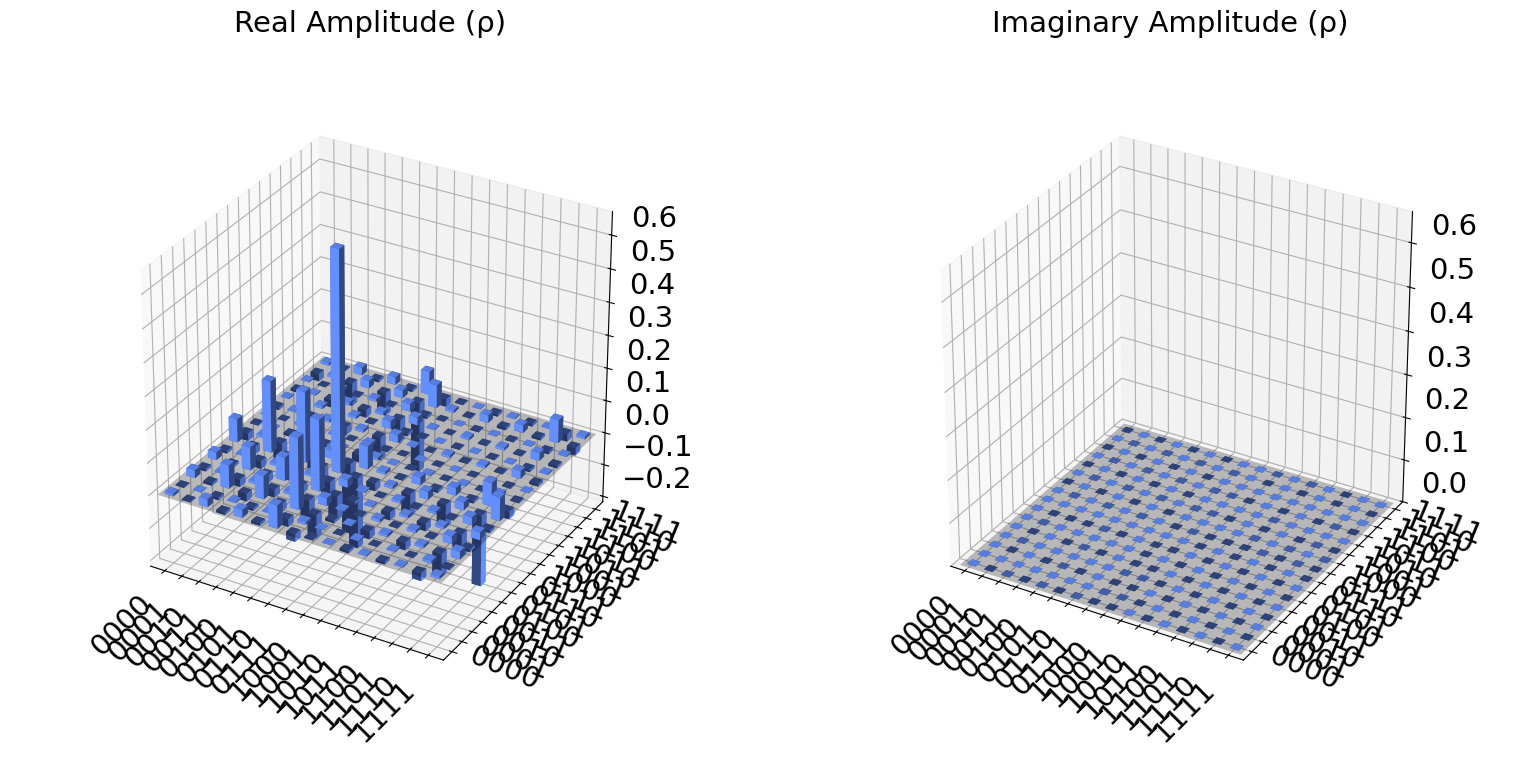

In [15]:
print("Statevector:", state_vector)
# Plot opcional
plot_state_city(state_vector)